6.698851528247071


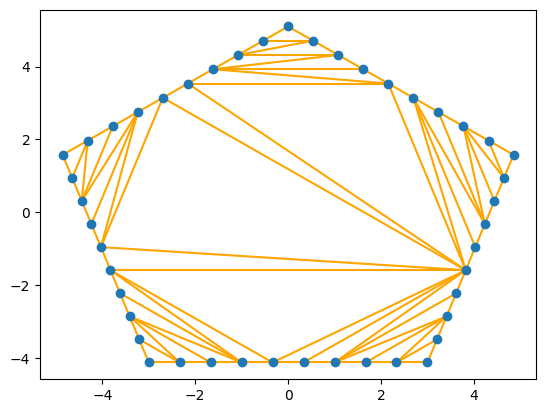

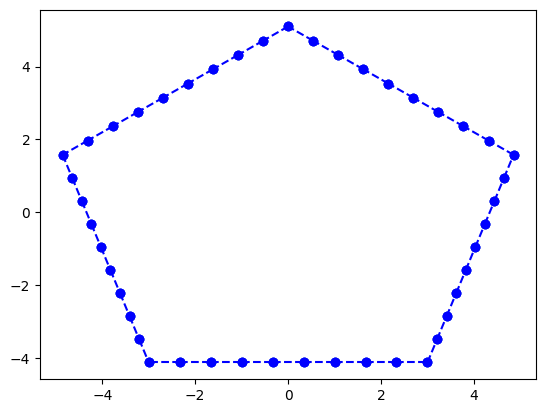

In [2]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from gemmini.d2.polar2D import *
from gemmini.d2.polygon2D import RegularPolygon
import math

f = RegularPolygon(6, 10, nV=5)
r = f.rad()
print(r)
points = f.coords() #1*np.random.rand(100, 2)

def exterior(points, alpha=0.9, scale=1.0):
    Q = []
    opp = {}
    neighbors = [[] for _ in range(len(points))]
    temps = []

    tri = Delaunay(points)

    def find_opp(opp, temps, i, j, k):
        if (i, j) in opp :
            opp[(i, j)].append(k)
            return
        
        opp[(i, j)] = [k]
        temps.append((i, j))
        neighbors[i].append(j)
        neighbors[j].append(i)

    for i, j, k in tri.simplices:
        i, j, k = sorted([i, j, k])
        pa = points[i]
        pb = points[j]
        pc = points[k]

        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

        # Semiperimeter of triangle
        s = (a + b + c)/2.0

        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        r = a*b*c/(4.0*area)

        # Here's the radius filter.
        if r < scale*1.0/alpha:
            find_opp(opp, temps, i, j, k)
            find_opp(opp, temps, j, k, i)
            find_opp(opp, temps, i, k, j)

    for k,v in opp.items():
        if len(v) == 1:
            Q.append(k)

    ER = set()

    while Q:
        i, j = Q.pop()

        k = opp[(i, j)][0]

        erasable = True

        for nb in neighbors[k]:
            _i, _j = min(nb, k), max(nb, k)

            if len(opp[(_i, _j)]) == 1:
                erasable = False
                break

        if not erasable:
            continue

        ER.add((i, j))

        _i, _k = min(i, k), max(i, k)
        opp[(_i, _k)].remove(j)
        Q.append((_i, _k))

        _j, _k = min(j, k), max(j, k)
        opp[(_j, _k)].remove(i)
        Q.append((_j, _k))

    res = []
    for k,v in opp.items():
        if len(v) == 1 and k not in ER:
            res.append(k)

    return res, temps


xs, ys = points[:, 0], points[:, 1]
plt.scatter(xs, ys)

exterior_edges, temps = exterior(points, alpha=0.9, scale=r)

for e in temps:
    i, j = e

    _x = [points[i][0], points[j][0]]
    _y = [points[i][1], points[j][1]]
    plt.plot(_x, _y, 'orange', zorder=0) 

plt.show()

xs, ys = points[:, 0], points[:, 1]
plt.scatter(xs, ys)

for i, j in exterior_edges:
    pa = points[i]
    pb = points[j]

    _x = [pa[0], pb[0]]
    _y = [pa[1], pb[1]]
    plt.plot(_x, _y, 'bo', linestyle="--", zorder=1)

plt.show()

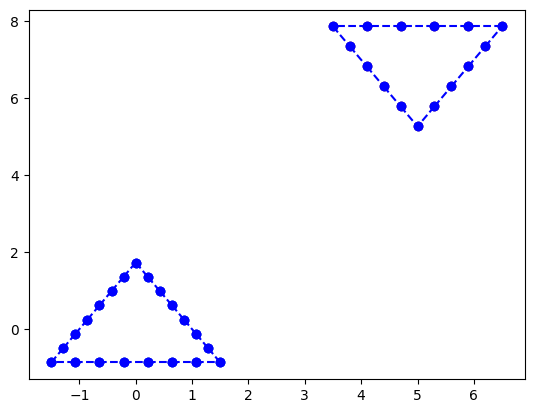

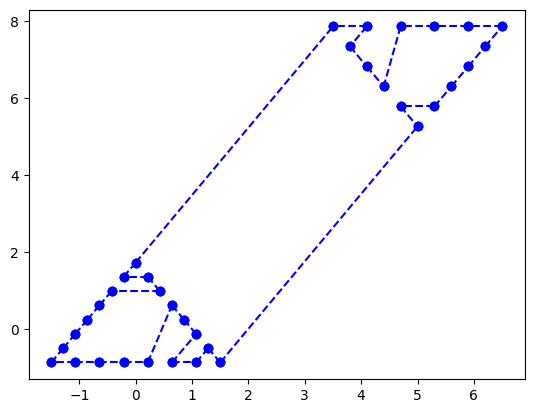

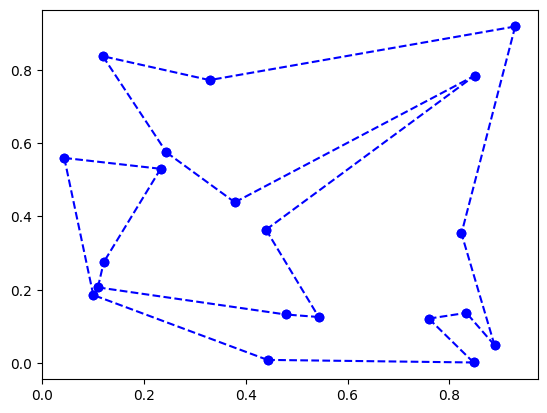

In [2]:
from gemmini.d2.polygon2D import RegularPolygon
from gemmini.d2.point2D import Pointcloud2D
from gemmini.misc import *
from gemmini.calc.coords import concave_hull

f1 = RegularPolygon(s=3, nD=8, nV=3)
f2 = RegularPolygon(s=3, nD=6, nV=3)
f2.rotate(pi/3)
f2.translate(5, 7)

c1 = f1.coords()
c2 = f2.coords()
x1, y1 = c1[:, 0], c1[:, 1]
x2, y2 = c2[:, 0], c2[:, 1]

plt.scatter(x1, y1)
plt.scatter(x2, y2)

ep1, ee1 = concave_hull(c1, alpha=0.9)
ep2, ee2 = concave_hull(c2, alpha=0.9)

for i, j in ee1:
    pa = c1[i]
    pb = c1[j]

    _x = [pa[0], pb[0]]
    _y = [pa[1], pb[1]]
    plt.plot(_x, _y, 'bo', linestyle="--", zorder=1)

for i, j in ee2:
    pa = c2[i]
    pb = c2[j]

    _x = [pa[0], pb[0]]
    _y = [pa[1], pb[1]]
    plt.plot(_x, _y, 'bo', linestyle="--", zorder=1)

plt.show()

c3 = np.concatenate((c1, c2), axis=0)
plt.scatter(x1, y1)
plt.scatter(x2, y2)

ep3, ee3 = concave_hull(c3, alpha=0.9)

for i, j in ee3:
    pa = c3[i]
    pb = c3[j]

    _x = [pa[0], pb[0]]
    _y = [pa[1], pb[1]]
    plt.plot(_x, _y, 'bo', linestyle="--", zorder=1)

plt.show()

c4 = np.random.rand(20, 2)
ep4, ee4 = concave_hull(c4, alpha=0.9)

for i, j in ee4:
    pa = c4[i]
    pb = c4[j]

    _x = [pa[0], pb[0]]
    _y = [pa[1], pb[1]]
    plt.plot(_x, _y, 'bo', linestyle="--", zorder=1)

plt.scatter(ep4[:, 0], ep4[:, 1], c='orange', zorder=5)
plt.show()

/home/yankos/gemmini/.venv/lib64/python3.9/site-packages/gemmini-0.1.0-py3.9.egg/gemmini/misc.py:31: UserWarning:              [WARN] We do not support dimensions except 2d or 3d         


0.3928371006591931


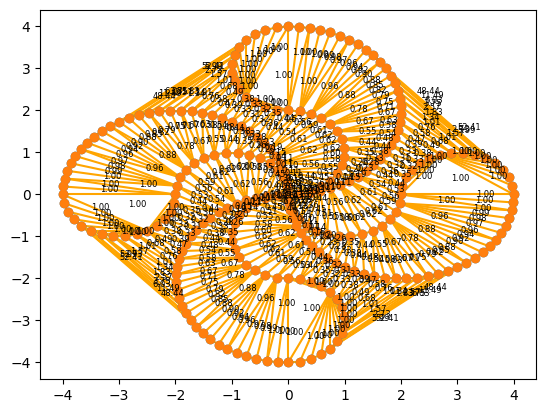

[(174, 175), (32, 33), (31, 32), (29, 30), (28, 29), (48, 49), (30, 31), (49, 50), (27, 28), (50, 51), (158, 159), (157, 158), (155, 156), (156, 157), (149, 176), (92, 93), (93, 94), (91, 92), (90, 91), (90, 112), (177, 178), (127, 188), (221, 222), (39, 209), (38, 209), (39, 40), (211, 212), (220, 221), (219, 220), (237, 238), (217, 218), (218, 219), (216, 217), (238, 239), (215, 216), (212, 213), (132, 239), (25, 26), (26, 27), (21, 101), (22, 100), (22, 23), (16, 17), (16, 52), (17, 18), (20, 21), (101, 102), (154, 155), (153, 154), (151, 152), (152, 153), (147, 227), (148, 226), (147, 177), (148, 149), (150, 151), (150, 176), (145, 146), (227, 228), (146, 228), (205, 206), (205, 241), (206, 207), (203, 242), (207, 208), (208, 240), (94, 95), (95, 96), (84, 164), (85, 163), (144, 145), (144, 229), (143, 229), (68, 69), (70, 175), (171, 172), (77, 168), (78, 167), (167, 168), (78, 79), (136, 137), (137, 234), (233, 234), (138, 233), (136, 235), (190, 251), (133, 236), (236, 237), (13

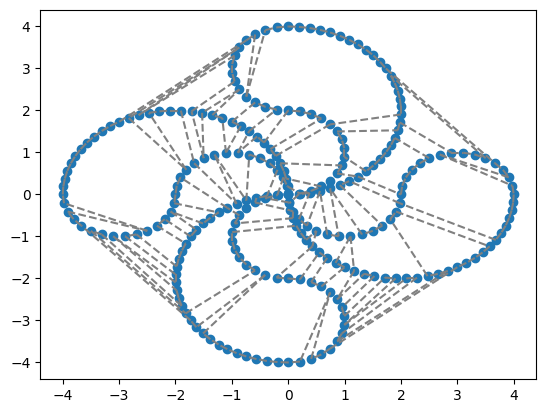

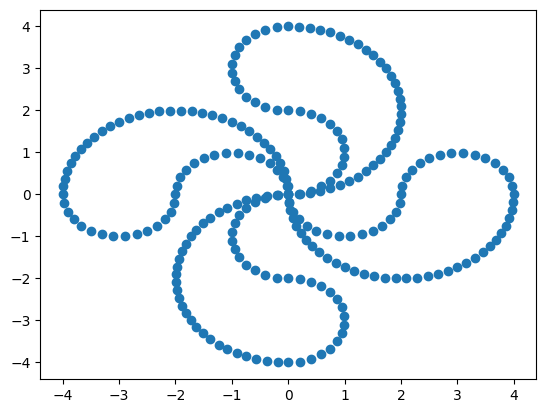

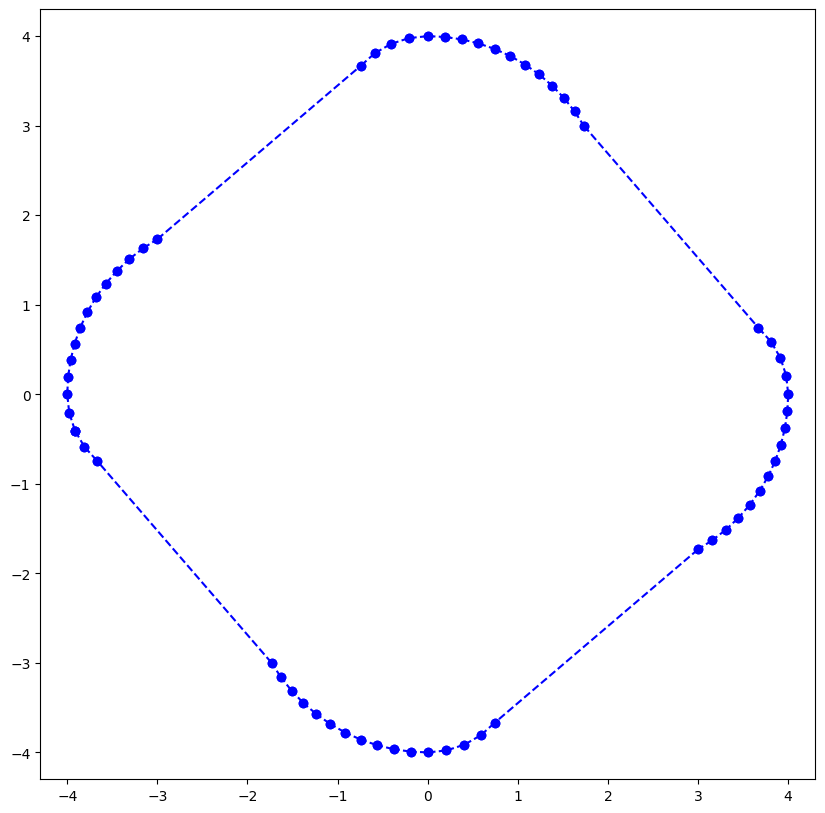

In [7]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import shapely.geometry as geometry
from shapely import MultiPolygon
from shapely.ops import unary_union, polygonize
from descartes import PolygonPatch
import numpy as np
import math
import gemmini as gm

global temps, edge_points, points
#f = gm.ConcaveStar(s=10, num_vertex=5, num_dot=7)
f = gm.BasqueCross(s=8, n=64)
#f = gm.RegularPolygon(3, num_vertex=4, n=2)
#f = gm.Rhombus(s=8, num_dot=[6,12,12,6])

points = f.coords() #1*np.random.rand(50, 2)
alpha = 0.9
r = f.rad()
n = len(f)

edges = set()
edge_points = []

def add_edge(edges, i, j, k):
    if (i, j) in edges or (j, i) in edges:
        return
    
    edges.add((i, j))
    edge_points.append([points[i], points[j]])

tri = Delaunay(points)

xs, ys = points[:, 0], points[:, 1]
    
print(r/(alpha * math.sqrt(n)))
    
plt.scatter(xs, ys)

for ia, ib, ic in tri.simplices:
    pa = points[ia]
    pb = points[ib]
    pc = points[ic]

    # Lengths of sides of triangle
    a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
    b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
    c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

    # Semiperimeter of triangle
    s = (a + b + c)/2.0

    # Area of triangle by Heron's formula
    area = math.sqrt(s*(s-a)*(s-b)*(s-c))
    circum_r = a*b*c/(4.0*area)
        
    xc, yc = np.mean([pa[0], pb[0], pc[0]]), np.mean([pa[1], pb[1], pc[1]])

    plt.text(xc, yc, '%.2f'%(circum_r), fontsize=6)

    # Here's the radius filter.
    #if circum_r < r/(alpha * math.sqrt(n)):
    if circum_r < r/(alpha):
        add_edge(edges, ia, ib, ic)
        add_edge(edges, ib, ic, ia)
        add_edge(edges, ia, ic, ib)

m = geometry.MultiLineString(edge_points)
triangles = list(polygonize(m))
res = unary_union(triangles)

plt.scatter(xs, ys)
    
for e in edges:
    i, j = e

    _x = [points[i][0], points[j][0]]
    _y = [points[i][1], points[j][1]]
    plt.plot(_x, _y, 'orange', zorder=0)

plt.show()

# # # # # # # # # # # # # # # # # # # # # # # # #
#                                               #
#             Gemmini Convae Hull               #
#                                               #
# # # # # # # # # # # # # # # # # # # # # # # # #
    
ep, ee = gm.concave_hull(points)
    
plt.scatter(xs, ys)
    
for p, q in ee:
    plt.plot([p[0], q[0]], [p[1], q[1]], 'grey', linestyle="--", zorder=1)

plt.show()

# # # # # # # # # # # # # # # # # # # # # # # # #
#                                               #
#             Shapely Convae Hull               #
#                                               #
# # # # # # # # # # # # # # # # # # # # # # # # #

plt.scatter(xs, ys)

def plot_polygon(polygon):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    margin = .3

    x_min, y_min, x_max, y_max = polygon.bounds

    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])

    if isinstance(polygon, MultiPolygon):
        coord = [list(x.exterior.coords) for x in polygon.geoms]
    else :
        coord = [list(polygon.exterior.coords)]

    for _c in coord:
        _x = [a[0] for a in _c]
        _y = [a[1] for a in _c]

        _n = len(_x)

        for i in range(_n):
            plt.plot([_x[i], _x[(i+1)%_n]], [_y[i], _y[(i+1)%_n]], 'bo--')

_ = plot_polygon(res)
plt.show()

In [12]:
def func(*args, **kwargs):
    return hash(args + tuple([(k, v) for k, v in kwargs.items()]))

func(3,4,a=5,b=6)

-6669487137595230996

In [9]:
import gemmini as gm

from shapely import geometry
import matplotlib.pyplot as plt

f = gm.Polygontile(s=4, v=5)
poly = geometry.Polygon(*f.coordSet())

POLYGON ((0.8980559531591708 1.2360679774997896, 0.9597258534760096 1.4258684144441638, 1.0213957537928486 1.6156688513885382, 1.0830656541096875 1.8054692883329126, 1.1447355544265265 1.9952697252772869, 1.2064054547433656 2.185070162221661, 1.2680753550602046 2.3748705991660355, 1.3297452553770435 2.56467103611041, 1.3914151556938825 2.7544714730547843, 1.4530850560107216 2.9442719099991583, 1.2916311608984195 3.0615750311103627, 1.1301772657861169 3.1788781522215674, 0.9687233706738145 3.296181273332772, 0.8072694755615122 3.4134843944439766, 0.6458155804492098 3.5307875155551813, 0.4843616853369074 3.648090636666386, 0.322907790224605 3.7653937577775904, 0.1614538951123026 3.882696878888795, 0.0000000000000002 3.9999999999999996, -0.1614538951123021 3.8826968788887952, -0.3229077902246046 3.7653937577775904, -0.484361685336907 3.648090636666386, -0.6458155804492095 3.5307875155551813, -0.8072694755615119 3.413484394443977, -0.9687233706738144 3.296181273332772, -1.1301772657861169 

(<matplotlib.patches.PathPatch at 0x7f9659c31c40>,
 <matplotlib.lines.Line2D at 0x7f9659b242b0>)

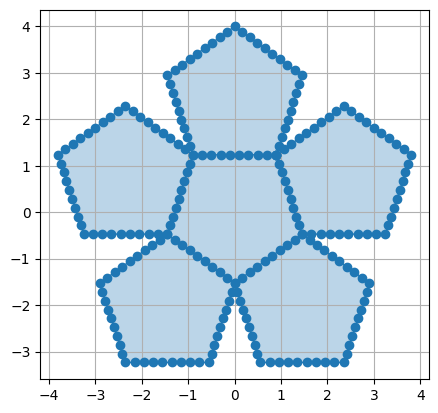

In [10]:
from shapely.plotting import plot_polygon

print(poly.wkt)
plot_polygon(poly)